# Análise 1

Objetivo: Obter e ver os dados

2016-09-13T18:04:59Z
[-66.766, -9.915]
2016-09-13T18:04:59Z
[-66.84, -10.035]
2016-09-13T18:04:59Z
[-66.97, -9.971]
2016-09-13T18:04:59Z
[-66.786, -9.908]
2016-09-20T18:10:28Z
[-67.089, -9.999]


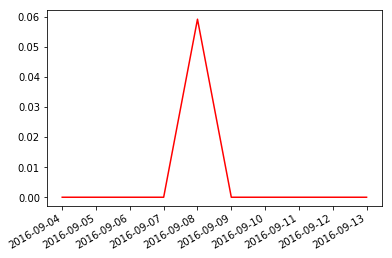

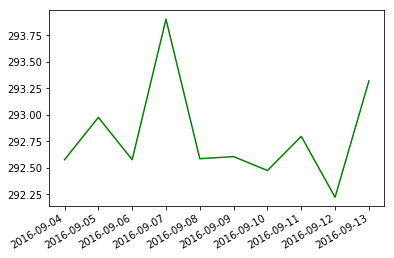

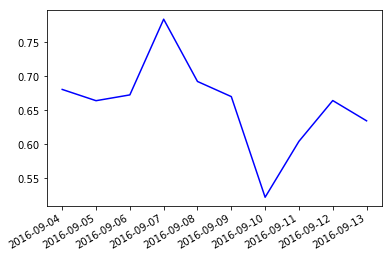

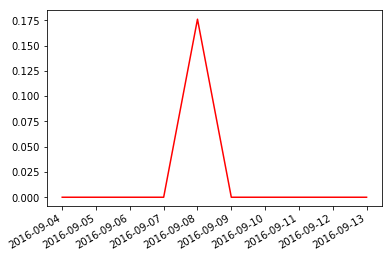

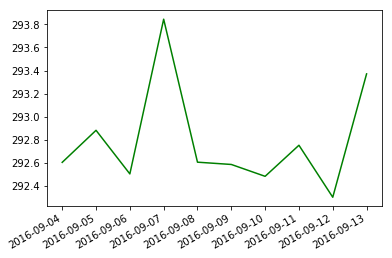

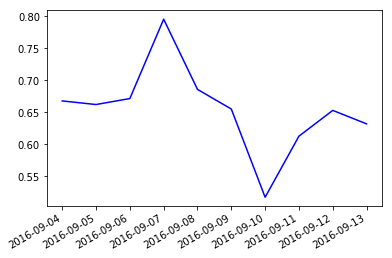

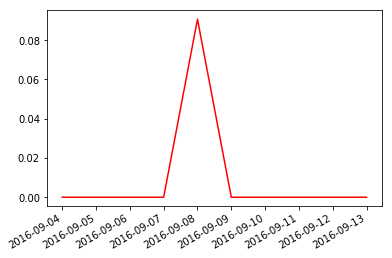

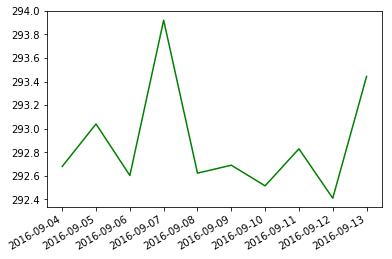

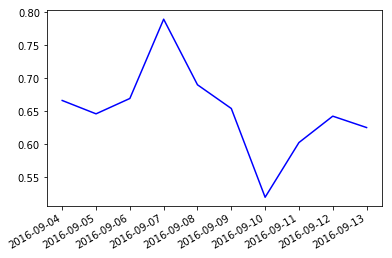

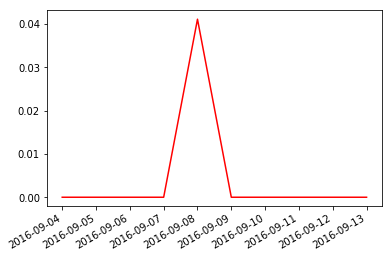

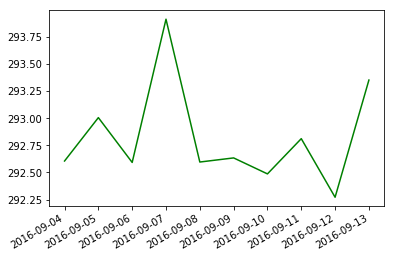

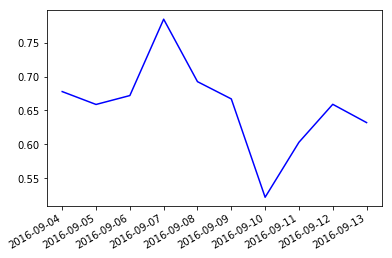

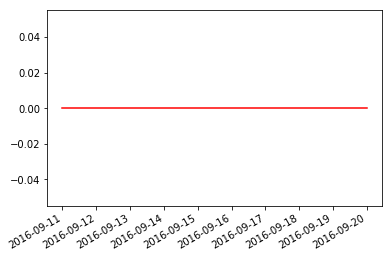

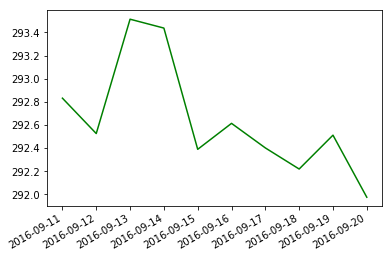

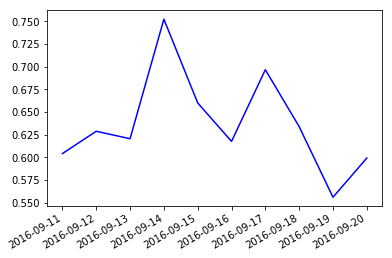

In [47]:
from bdq import bdq
from wtss import wtss
from datetime import datetime, timedelta
import matplotlib.pyplot as pyplot
import matplotlib.dates as mdates

days_before=10

feature_name='esensing:focos_bra_2016'
b = bdq("http://localhost:8080/geoserver-esensing/")
#ft_scheme = b.describe_feature("esensing:focos_bra_2016")
fc = b.feature_collection("esensing:focos_bra_2016", 
                          attributes=("id","municipio","timestamp"), 
                          #within="POLYGON((-49.8929205749999 1.21448026000007,-50.945202767 0.671596891000149,-51.2334818149999 0.0142109470000378,-49.8929205749999 1.21448026000007))", 
                          filter=["satelite_referencia='true'"], 
max_features=5)



w = wtss("http://www.dpi.inpe.br/ts")
cv_scheme = w.describe_coverage("rpth")

#print(cv_scheme['attributes']['risk']['valid_range']['max'])

for feature in fc['features']:
    print(feature['timestamp'])
    print(feature['coordinates'])
    
for feature in fc['features']:
    #    feature = fc['features'][0]
    #print(feature['timestamp'])
    end_date = datetime.strptime(feature['timestamp'],"%Y-%m-%dT%H:%M:%SZ")
    start_date = end_date-timedelta(days=(days_before-1))
    #print(end_date.strftime("%Y-%m-%d"))
    #print(start_date.strftime("%Y-%m-%d"))
    ts = w.time_series("rpth", ("risk", "precipitation", "temperature", "humidity"), feature['coordinates'][1], feature['coordinates'][0], start_date=start_date.strftime("%Y-%m-%d"), end_date=end_date.strftime("%Y-%m-%d"))

    fig, ax = pyplot.subplots()
    ax.plot(ts.timeline, ts['precipitation'], 'red')
    fig.autofmt_xdate()
    pyplot.show()
    
    fig, ax = pyplot.subplots()
    ax.plot(ts.timeline, ts['temperature'], 'green')
    fig.autofmt_xdate()
    pyplot.show()
    
    fig, ax = pyplot.subplots()
    ax.plot(ts.timeline, ts['humidity'], 'blue')
    fig.autofmt_xdate()
    pyplot.show()
    



In [31]:
#risk = [i for i in ts['risk'] if i >= cv_scheme['attributes']['risk']['valid_range']['max']]

#print(len(risk))

print(ts['humidity'])

[0.6806908845901489, 0.6641557812690735, 0.6726574897766113, 0.7838547825813293, 0.6923919320106506, 0.670157790184021, 0.5223414897918701, 0.6044595241546631, 0.664360761642456, 0.6345884799957275]


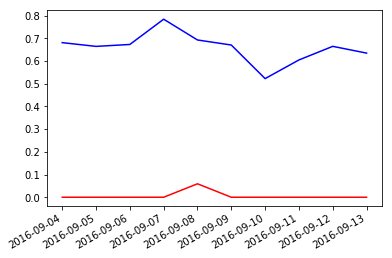

In [39]:



fig, ax = pyplot.subplots()

ax.plot(ts.timeline, ts['precipitation'], 'red')
#ax.plot(ts.timeline, ts['temperature'], 'green')
ax.plot(ts.timeline, ts['humidity'], 'blue')

fig.autofmt_xdate()

pyplot.show()

In [ ]:
from wtss import wtss


w = wtss("http://www.dpi.inpe.br/ts")
cv_list = w.list_coverages()
print(cv_list)